**Hw04.ipynb**

Programming assignment are enclosed by the following marks

In [1]:
# *****************************************************************************

Compare function approximation results using CV vs using the entire training data set.

I. Generate the mystery data over [-1,1]. $d(x) = x + 1$, $-1 \leq x < 0$ and $d(x) = 0.5x$, $- \leq x \leq 1$. 200 training samples $\{x_i\}$ uniformly, randomly sampled within [-1,1]. $y = d(x) + \epsilon$ where $\epsilon$ ~ $N(0,0.04)$ (that is $\sigma = 0.2$). 

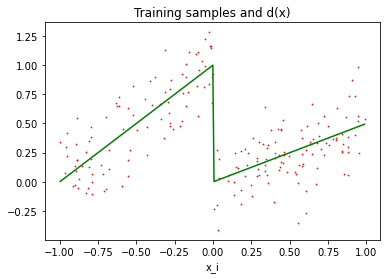

In [2]:
import numpy as np
import matplotlib.pyplot as plt


K = 200
xi = np.sort(np.random.rand(K)*2 - 1)
dx = np.multiply((xi + 1),(xi < 0)) + 0.5 * np.multiply(xi,xi >= 0)
yi = dx + 0.2 *np.random.randn(K)

plt.plot(xi,dx,'g')
plt.scatter(xi,yi,c='red',s=.5)
plt.xlabel('x_i')
plt.title('Training samples and d(x)')
plt.show()

2. Now, we consider a 10-way cross validation that partitions the indices 1:200 into interleaved 10 non-overlapping subset: $Iv(m), 1\leq m \leq 10$. The training set $Ir(m)$ will be the set difference between [1:200] and $Iv(m)$. 

In [3]:
Iv = [[]] * 10
Ir = [[]] * 10
# ******************************************************************
# Generate cross validation partitions (indices)
# Ir[m], Iv[m], m = 1:10
# ******************************************************************

for m in range(10):
    Iv[m] = range(m,K,10) # Indices of 10 validation sets.
    Ir[m] = np.setdiff1d(range(K),Iv[m])

Next, a polynomail approximation of $d(x)$ will be performed with 10-way cross validation for each polynomial order $N$ varying from 1 to 15.

For each polynomial order $N$, we perform the follwoing tasks:

1. Compute 10 N-th order polynomials as columns of a K by 10 matrx $Fwx^{(N)}$. The m-th column of $Fwx^{(N)}$ will be the least-square fitted polynomial trained using $Ir(m), m = 1:10$.

2. Compute an error vector $e_r$ whose indices over the m-th validate index set $Iv(m)$ equals to the difference between $y_i$ over $Iv(m)$ and the m-th column of $Fwx^{(N)}$ matrix over the same index range. The validation error which is an estimation of the emprical risk for the polynomial order N then can be evaluated as $IN(w) = $\|e_r\|^2/K. 

3. Compute a K by 1 mean vector $\overline{Fwx}^{(N)}(Fwxbar{N})$ of the 10 columns of the  matrix. $Bias^2(N) = \|dx - Fwx^{(N)}\|^2. 

4. Compute a K by 1 variance vector $v^{(N)}$ whose i-th element, $1\leq i\leq K$ equals to the variance of the i-th row of the $Fwx^{(N)}$ matrix. The variance of these 10 polynomial estimates then equals to $Var(N) = \sum_i v_i^{(N)}/K$.

Finally plot $I^{(N)}(w)$ and $Var(N)$ versus polynomial order $N$. Use log in the y scale (semilogy). 

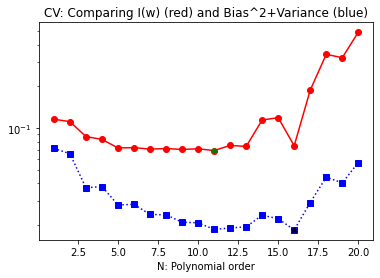

In [4]:
Nmax = 20
Iw = np.zeros(Nmax)
Var = np.zeros(Nmax)
Fwx = [[]] * Nmax
Fwxbar = [[]] * Nmax
er = [[]] * Nmax
Var = [[]] * Nmax
bias2 = [[]] * Nmax

for N in range(Nmax):
    Fwx[N] = np.zeros((K,10))
    er[N] = np.zeros(K)
    Fwxbar[N] = np.zeros(K)
    w = [[]] * 10
    
    for m in range(10):
        # *******************************************************************
        # Perform 10-way cross validation to estimate w[m], Fwx[N][:,m], and
        # er[N][Iv[m]]
        # *******************************************************************
        w[m] = np.polyfit(xi[Ir[m]], yi[Ir[m]], N+1)
        p = np.poly1d(w[m])
        Fwx[N][:,m] = p(xi)
        er[N][Iv[m]] = (yi-Fwx[N][:,m])[Iv[m]]
        
    Iw[N] = np.linalg.norm(er[N])**2/K
    Fwxbar[N] = np.mean(Fwx[N],1)
    bias2[N] = np.linalg.norm(dx - Fwxbar[N])**2/K
    vari =np.var(Fwx[N],axis=1)
    Var[N] = np.sum(vari)/K
    
Nstar = np.argmin(Iw)
bpv = np.add(bias2, Var)
bpvmin = np.argmin(bpv)

plt.semilogy(range(1,Nmax+1),Iw,'ro-')
plt.semilogy(range(1,Nmax+1),bpv,'bs:')
plt.semilogy(Nstar+1,Iw[Nstar],'g*',bpvmin+1, bpv[bpvmin],'k*')
plt.title('CV: Comparing I(w) (red) and Bias^2+Variance (blue)')
plt.xlabel("N: Polynomial order")
plt.show()

3. Now, we simply use the entire training data to estimate a polynomial with polinomial order N varying from 1 to Nmax

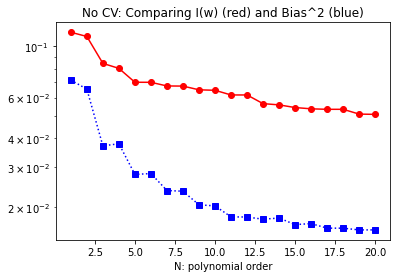

In [5]:
Iw0 = np.zeros(Nmax)
bias20 = np.zeros(Nmax)
Fwx0 = [[]] * Nmax
Iw0 = [[]] * Nmax

for N in range(Nmax):
    # ****************************
    # fit xi, yi to an N-th order polynomial
    # evaluate the estimated N-th order polynomial Fwx0{N}
    # evaluate the empirical risk associated with Fwx0{N}, Iw0(N)
    # evaluate bias square between Fwx0{N} and dx, bias20(N)
    # ****************************
    w = np.polyfit(xi, yi, N+1)
    p = np.poly1d(w)
    Fwx0[N] = p(xi)
    er[N] = (yi-Fwx0[N])
    Iw0[N] = np.linalg.norm(er[N])**2/K
    bias20[N] = np.linalg.norm(dx - Fwx0[N])**2/K

N0min = np.argmin(Iw0)
B0min = np.argmin(bias20)

plt.semilogy(range(1,Nmax + 1), Iw0,'ro-')
plt.semilogy(range(1,Nmax + 1), bias20,'bs:')
plt.xlabel('N: polynomial order')
plt.title('No CV: Comparing I(w) (red) and Bias^2 (blue)')
plt.show()

4. Plot the two fitting polynomials with and without cross validation:

C:\Users\yaoqi\AppData\Local\Temp/ipykernel_17960/927851356.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xi,dx,'g',LineWidth=4)


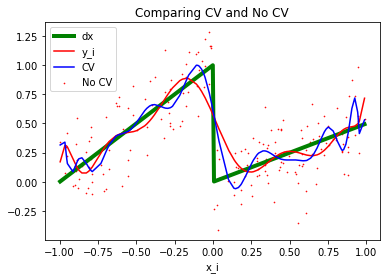

In [6]:
plt.plot(xi,dx,'g',LineWidth=4)
plt.scatter(xi,yi,c='red',s=.4)
plt.plot(xi,Fwxbar[Nstar],'r-',xi,Fwx0[N0min],'b-')
plt.legend(['dx','y_i','CV','No CV'])
plt.xlabel('x_i')
plt.title('Comparing CV and No CV')
plt.show()